In [3]:
def master_equation(t, y):
    # Define the master equation here
    dydt = [y[1], -ga*y[1] - Gam*np.sin(y[0]) + Om, 0]  # Added a third equation
    return dydt

def slave_equation(t, y, tm):
    # Define the slave equation here
    dydt = [y[1], -ga*y[1] - Gam*np.sin(y[0]) + c*(tm[0]-y[0]), 0]  # Added a third equation
    return dydt

def Runge_master(tm):
    sol = solve_ivp(master_equation, [0, h], tm, method='RK45')
    return sol.y[:, -1]

def Runge_slave(ts, tm):
    sol = solve_ivp(slave_equation, [0, h], ts, args=(tm,), method='RK45')
    return sol.y[:, -1]

C:\Users\Ali\AppData\Local\Temp\ipykernel_26980\2014824678.py:39: RuntimeWarning: divide by zero encountered in log
  p = np.polyfit(xn[3:12], np.log(yn[3:12]), 1)


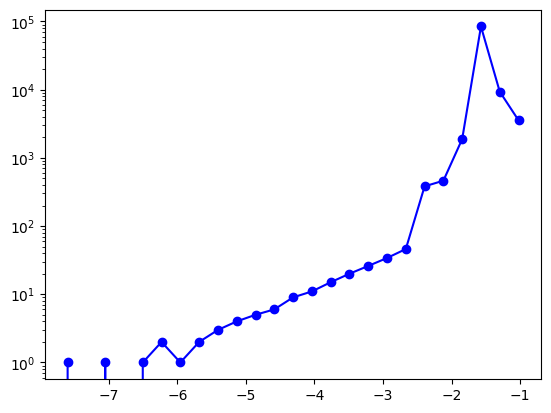

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# set parameters
ga  = 0.2
Gam = 1.2
Om  = 0.5
c   = 0.79
h = 0.001
Nit = 100000

# Initial conditions
tm = np.array([0.1, 0.2, 0])
ts = np.array([0.1, 0.2, 0])

# Define Runge_master and Runge_slave functions here


et = np.zeros(Nit)
v = np.zeros(Nit)
tmm = np.zeros((3, Nit))
tss = np.zeros((3, Nit))

for k in range(Nit):
    tm = Runge_master(tm)  
    ts = Runge_slave(ts, tm)
    
    et[k] = np.log(np.sqrt((ts[0]-tm[0])**2 + (ts[1]-tm[1])**2))
    v[k] = np.sqrt((ts[0]-tm[0])**2 + (ts[1]-tm[1])**2)
    tmm[:, k] = tm
    tss[:, k] = ts

yn, xn = np.histogram(et, 25)

plt.figure()
plt.semilogy(xn[:-1], yn, '-ob')

p = np.polyfit(xn[3:12], np.log(yn[3:12]), 1)

plt.semilogy(xn, np.exp(p[1])*np.exp(xn*p[0]), '-r')
plt.show()